# Project description

The aim of this project is to build machine learning classifiers to be used on the [Adult Dataset](https://archive.ics.uci.edu/ml/datasets/adult). kNN, random forest, classification trees and a Muli-Layer Perceptron model will be trained to predict whether a person income is more than US$50k/year or not. The accuracy, precision and recall for each classifier will be compared.

The Adult Dataset consists of 48842 observations (with missing data) and 14 features. The UCI Repository already provides files for the training and testing sets (2/3 and 1/3 of total observations, respectively).

## Problem

Practice: Classifiers for the Adult Dataset

1. Get the dataset Adult (either in the UCI Repository or in Kaggle).

2. Analyze features, missing data, and overall characteristics of the dataset (using tools in sklearn). Select features, discretize numerical features, handle missing data. 

3. Build a kNN classifier to predict class variable ">50k" (that is, whether person gets more than US$50k/year or not). Select the hyperparameter using cross-validation; test the final classifier using a holdout dataset.

4. Repeat (3) using either a classification tree or a random forest.

5. **Present accuracy, precision and recall for the best classifier in (3) and in (4).**

6. Extra points: repeat (3) using a Multi-Layer Perceptron. 

# Exploratory analysis

In [164]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


# from skleaerrn import metrics
# from pandas.tools.plotting import scatter_matrix
# import matplotlib.pyplot as plt
# from sklearn import model_selection
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.naive_bayes import GaussianNB
# from sklearn import preprocessing
# from sklearn.svm import SVC
# from sklearn.cross_validation import train_test_split
# from sklearn import tree

In [165]:
# Loading the test dataset
df_train = pd.read_csv('./dataset/adult_data.csv', header=None)

In [166]:
df_train.shape # 32561 observations and 14 features 

(32561, 15)

In [167]:
df_train.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [168]:
# Loading the training dataset
df_test = pd.read_csv('./dataset/adult_test.csv', header=None)

In [169]:
df_test.shape # 16281 observations and 14 features

(16281, 15)

In [170]:
df_test.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


Although UCI Repository already provides the dataset splited into training and testing, in this project the two subsets will be concatenated and splited again after the preprocessing steps.

In [171]:
# The dataset will be splited into training and test after the preprocessing step
df = pd.concat([df_train, df_test])
df.shape

(48842, 15)

In [172]:
# Change colnames
df = df.rename(columns={
    0:"age",
    1:"workclass",
    2:"fnlwgt",
    3:"education",
    4:"education-num",
    5:"matrial-status",
    6:"occupation",
    7:"relationship",
    8:"race",
    9:"sex",
    10:"capital-gain",
    11:"capital-loss",
    12:"hours-per-week",
    13:"native-country",
    14:"income"
})

In [173]:
# Verify the class of each feature
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
matrial-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Verifying the levels of categorial data and respectively frequency


In [174]:
[print(f"\n## {column} ##\n{df[column].value_counts(normalize=True)*100}") for column in df.select_dtypes(include=['object'])]


## workclass ##
Private             69.419762
Self-emp-not-inc     7.907129
Local-gov            6.420703
?                    5.730724
State-gov            4.055935
Self-emp-inc         3.470374
Federal-gov          2.931903
Without-pay          0.042996
Never-worked         0.020474
Name: workclass, dtype: float64

## education ##
HS-grad         32.316449
Some-college    22.271815
Bachelors       16.430531
Masters          5.439990
Assoc-voc        4.219729
11th             3.709922
Assoc-acdm       3.277917
10th             2.843864
7th-8th          1.955284
Prof-school      1.707547
9th              1.547848
12th             1.345154
Doctorate        1.216166
5th-6th          1.042136
1st-4th          0.505712
Preschool        0.169936
Name: education, dtype: float64

## matrial-status ##
Married-civ-spouse       45.819172
Never-married            32.998239
Divorced                 13.580525
Separated                 3.132550
Widowed                   3.107981
Married-spouse-abse

[None, None, None, None, None, None, None, None, None]

Checking for missing data reported as NA

In [175]:
df.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
matrial-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

The missing data was reported only as "?" and will be removed.

Below, we will check for outliers in continuous variables

In [176]:
    df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Apparently, there are outliers reported in capital-gain and hours-per-week variables. Let's check boxplots for each variable.

<AxesSubplot:xlabel='fnlwgt'>

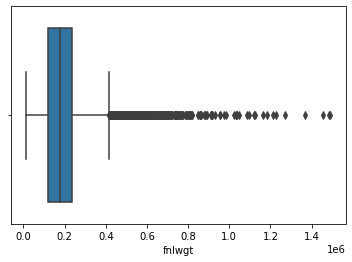

In [207]:
sns.boxplot(x=df['fnlwgt']) # Requires outlier removal by z-scores

<AxesSubplot:xlabel='education-num'>

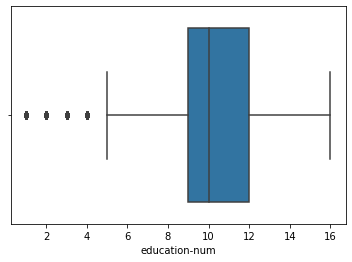

In [208]:
sns.boxplot(x=df['education-num'])

In [216]:
sum(df['education-num'] < 4) # Verify observations that reported education-num < 4

839

<AxesSubplot:xlabel='hours-per-week'>

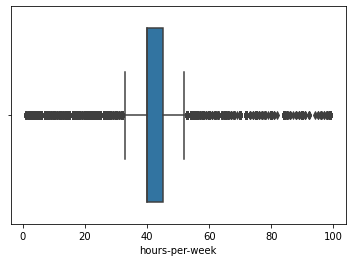

In [211]:
sns.boxplot(x=df['capital-gain'])

In [182]:
sum(df['capital-gain'] > 80000) # Verify observations that reported capital-gain > 80k

244

<AxesSubplot:xlabel='hours-per-week'>

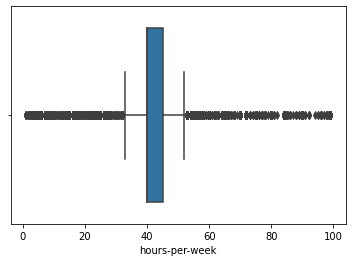

In [160]:
sns.boxplot(x=df['hours-per-week']) # Requires outlier removal by z-scores

In [191]:
sum(df['hours-per-week'] > 60) # Verify observations that reported hours-per-week > 60h

1676

In [196]:
sum(df['hours-per-week'] < 10) # Verify observations that reported hours-per-week < 10h

700

Observations who reported more than 60 hours worked per week (or less than 10 hours) or more than 80k as capital gain will be removed.

Outliers removal for fnlwgt variable will be done by z-score normalization

Maybe remove observations with less than 4 years of education

# Preprocessing data

### Handling with missing data and outliers

In [141]:
# Replace variables reported as unknown values ("?") for NaN
df = df.replace('?', np.NaN)

In [142]:
df.isna().any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
matrial-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
income            False
dtype: bool

In [144]:
# Remove missing data
df = df.dropna()
df.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
matrial-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

In [148]:
df.shape # 3620 observations removed

(45222, 15)

In [197]:
# Remove outliers in the capital-gain variables
